# Quantum Random Generator

Quantum Random Number Generators (QRNGs) exploit the inherent randomness of quantum mechanics to produce truly random numbers. Unlike classical pseudo-random number generators (PRNGs), which rely on deterministic algorithms and initial "seed" values, QRNGs use the fundamental probabilistic nature of quantum states to generate unpredictably random numbers.

The primary principle behind QRNGs lies in quantum superposition and quantum measurement.

A QRNG takes advantage of these properties to generate random bits. Here’s the step-by-step process:

1. Initialize the Qubit in a known state (∣0⟩)
2. Apply a Hadamard Gate to create superposition
3. Measure the Qubit
4. Repeat for multiple bits

### Why Quantum Random Numbers Are "Truly" Random

In classical computing, random numbers are typically generated using algorithms that are deterministic in nature. These pseudo-random number generators (PRNGs) produce numbers that appear random but are actually the result of deterministic processes and can be reproduced if the initial seed is known.

In contrast, quantum random number generators derive randomness from the fundamental unpredictability of quantum mechanics, which is governed by nature. This is why QRNGs are considered "truly" random:

 - No Predictability: In a quantum measurement, the outcome is inherently unpredictable. Even with perfect knowledge of the system, you cannot predict whether the measurement will yield 0 or 1.
 - No Hidden Variables: Unlike classical randomness, where the apparent unpredictability is due to ignorance of underlying factors, quantum randomness is intrinsic and cannot be predicted by any hidden information.

### Practical Applications of QRNG

 - Cryptography: High-quality randomness is essential for generating secure cryptographic keys. QRNGs are increasingly used in systems where true randomness is critical to security.
 - Simulations: In scientific simulations, random numbers are often used to model stochastic processes. QRNGs provide a superior alternative to PRNGs for such applications.
 - Gambling and Lotteries: Since QRNGs provide verifiable randomness, they can be used in applications like lotteries or online gambling to ensure fairness.

### Implementation

Here is the implementation of the Quantum Random Number Generator (QRNG) using Qiskit. This code will generate a sequence of random bits using the quantum principles we discussed earlier:

In [28]:
# Import necessary Qiskit modules
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

# Function to generate random bits using quantum mechanics
def generate_random_bits_quantum(num_bits):
    # Initialize the quantum circuit with 1 qubit and 1 classical bit
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit

    # Prepare the Aer simulator
    simulator = AerSimulator()

    # List to store the random bits
    random_bits = []
    
    for _ in range(num_bits):
        # Step 1: Apply Hadamard gate to create superposition
        qc.h(0)
        
        # Step 2: Measure the qubit
        qc.measure(0, 0)
        
        # Transpile the circuit to prepare for execution
        compiled_circuit = transpile(qc, simulator)
        
        # Step 3: Run the circuit on the simulator
        result = simulator.run(compiled_circuit, shots=1).result()
        
        # Step 4: Get the measurement result (either '0' or '1')
        counts = result.get_counts(compiled_circuit)
        measured_bit = int(list(counts.keys())[0])  # Extract the measured bit as an integer
        
        # Append the random bit to the list
        random_bits.append(measured_bit)
        
        # Reset the quantum circuit for the next iteration
        qc.reset(0)

    return random_bits


In [20]:
# Example usage:
num_bits = 100  # Specify the number of random bits to generate
random_bits = generate_random_bits(num_bits)
print("Random bits generated: ", random_bits)

Random bits generated:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]


### Statistical Analysis

Let's perform statistical analysis on the quantum random numbers to verify their randomness. We'll implement some simple statistical tests commonly used to analyze random bit sequences, such as:

 - Frequency Test (Proportion of 0s and 1s): This test checks whether the number of 0s and 1s in the random sequence is approximately equal, as expected for a fair random number generator.

 - Runs Test (Sequence of Consecutive Bits): This test checks whether the number of runs (sequences of consecutive 0s or consecutive 1s) is consistent with what is expected for a random sequence. If there are too many or too few runs, it might indicate the numbers aren't truly random.

 - Plotting the Distribution: We'll use a histogram to visually inspect the distribution of 0s and 1s.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def frequency_test(random_bits):
    num_zeros = random_bits.count(0)
    num_ones = random_bits.count(1)
    total_bits = len(random_bits)

    print("Frequency Test:")
    print(f"Number of 0s: {num_zeros}")
    print(f"Number of 1s: {num_ones}")
    print(f"Proportion of 0s: {num_zeros / total_bits:.2f}")
    print(f"Proportion of 1s: {num_ones / total_bits:.2f}")

# Function for Runs Test (Checks for runs of consecutive bits)
def runs_test(random_bits):
    runs = 1
    for i in range(1, len(random_bits)):
        if random_bits[i] != random_bits[i - 1]:
            runs += 1

    expected_runs = ((2 * len(random_bits)) - 1) / 3
    print(f"Runs Test:")
    print(f"Number of runs: {runs}")
    print(f"Expected number of runs: {expected_runs:.2f}")
    print(f"Difference from expected: {abs(runs - expected_runs):.2f}")

# Function to plot the distribution of 0s and 1s
def plot_random_bit_distribution(random_bits):
    plt.hist(random_bits, bins=2, edgecolor='black')
    plt.xticks([0, 1])
    plt.xlabel('Bit Value')
    plt.ylabel('Frequency')
    plt.title('Random Bit Distribution')
    plt.show()

Frequency Test:
Number of 0s: 40
Number of 1s: 60
Proportion of 0s: 0.40
Proportion of 1s: 0.60
Runs Test:
Number of runs: 53
Expected number of runs: 66.33
Difference from expected: 13.33


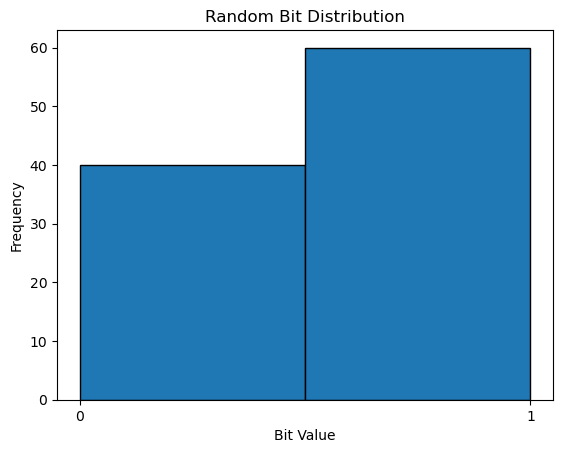

In [26]:
# Run the statistical tests
frequency_test(random_bits)
runs_test(random_bits)

# Plot the distribution of 0s and 1s
plot_random_bit_distribution(random_bits)

### Comparison with classical methods

Let's compare a classical pseudo-random number generator (PRNG) with the quantum random number generator (QRNG). 

In [30]:
import random
import matplotlib.pyplot as plt

# Classical Random Number Generator (PRNG)
def generate_random_bits_classical(num_bits):
    random_bits = [random.randint(0, 1) for _ in range(num_bits)]
    return random_bits

# Frequency Test (Proportion of 0s and 1s)
def frequency_test(random_bits, generator_name):
    num_zeros = random_bits.count(0)
    num_ones = random_bits.count(1)
    total_bits = len(random_bits)
    print(f"Frequency Test for {generator_name}:")
    print(f"Number of 0s: {num_zeros}")
    print(f"Number of 1s: {num_ones}")
    print(f"Proportion of 0s: {num_zeros / total_bits:.2f}")
    print(f"Proportion of 1s: {num_ones / total_bits:.2f}")

# Runs Test (Checks for consecutive 0s and 1s)
def runs_test(random_bits, generator_name):
    runs = 1
    for i in range(1, len(random_bits)):
        if random_bits[i] != random_bits[i - 1]:
            runs += 1
    expected_runs = ((2 * len(random_bits)) - 1) / 3
    print(f"Runs Test for {generator_name}:")
    print(f"Number of runs: {runs}")
    print(f"Expected number of runs: {expected_runs:.2f}")
    print(f"Difference from expected: {abs(runs - expected_runs):.2f}")

# Plotting the Distribution of Random Bits
def plot_random_bit_distribution(random_bits_classical, random_bits_quantum):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].hist(random_bits_classical, bins=2, edgecolor='black')
    ax[0].set_title('Classical PRNG Distribution')
    ax[0].set_xticks([0, 1])
    ax[0].set_xlabel('Bit Value')
    ax[0].set_ylabel('Frequency')

    ax[1].hist(random_bits_quantum, bins=2, edgecolor='black')
    ax[1].set_title('Quantum RNG Distribution')
    ax[1].set_xticks([0, 1])
    ax[1].set_xlabel('Bit Value')
    ax[1].set_ylabel('Frequency')

    plt.show()

Frequency Test for Classical PRNG:
Number of 0s: 48
Number of 1s: 52
Proportion of 0s: 0.48
Proportion of 1s: 0.52
Frequency Test for Quantum RNG:
Number of 0s: 46
Number of 1s: 54
Proportion of 0s: 0.46
Proportion of 1s: 0.54
Runs Test for Classical PRNG:
Number of runs: 58
Expected number of runs: 66.33
Difference from expected: 8.33
Runs Test for Quantum RNG:
Number of runs: 57
Expected number of runs: 66.33
Difference from expected: 9.33


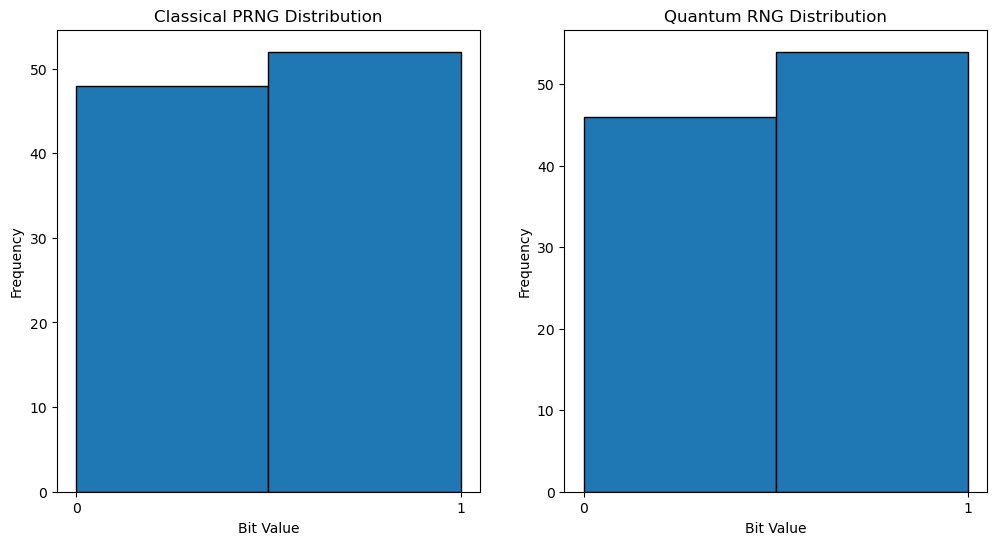

In [34]:
# Number of bits to generate
num_bits = 100  # You can increase this for larger comparisons

# Generate random bits using Classical PRNG and Quantum RNG
random_bits_classical = generate_random_bits_classical(num_bits)
random_bits_quantum = generate_random_bits_quantum(num_bits)

# Run Frequency Test for both
frequency_test(random_bits_classical, "Classical PRNG")
frequency_test(random_bits_quantum, "Quantum RNG")

# Run Runs Test for both
runs_test(random_bits_classical, "Classical PRNG")
runs_test(random_bits_quantum, "Quantum RNG")

# Plot the distribution of bits
plot_random_bit_distribution(random_bits_classical, random_bits_quantum)
